# Principle Component Analysis

In [1]:
from featureNormalize import featureNormalize
from pca import pca
from plotDataPoints import plot_data_points
from projectData import projectData
from recoverData import recoverData
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# used to split data in train and test sets
from sklearn.model_selection import train_test_split
#for metrics
from sklearn.metrics import accuracy_score

## Loading data and normalizing features

In [38]:
# Load an example dataset that we will be using
file_path = '../../data/1_diabetes.csv'
df = pd.read_csv(file_path)

features = df.drop('Outcome', axis=1)
labels = df['Outcome']

X = features.as_matrix()

print("Features size = ", features.shape[1])

y = labels.as_matrix()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#normalise features
X_norm, mu, sigma = featureNormalize(X_train)

Features size =  8


## Running Principal Component Analysis 
Implementing PCA, a dimension reduction technique. 


Running PCA on example dataset.




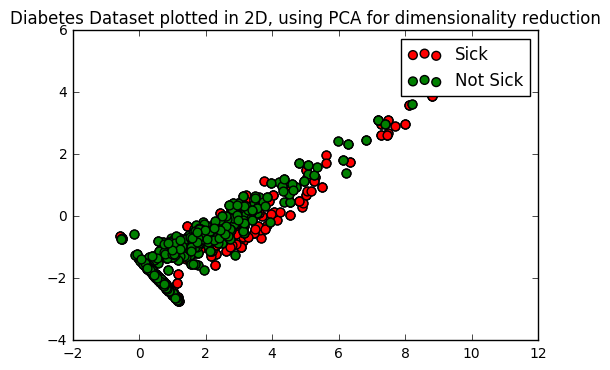

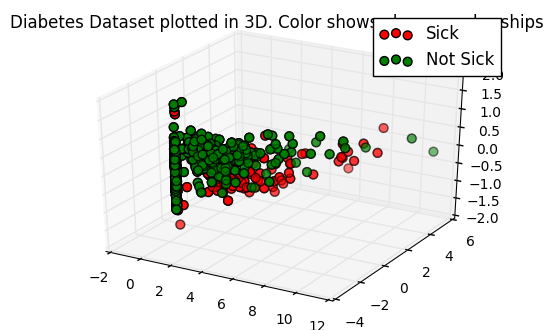

Recovered Features size =  8


In [40]:
print('\nRunning PCA on example dataset.\n\n')

#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

# project data to 2D
K = 2
Z = projectData(X_norm, U, K)

pos = np.where(y == 1)
neg = np.where(y == 0)

# plot 2D
plt.scatter(Z[pos, 0], Z[pos, 1],s=40, cmap=plt.cm.prism, c='r', label="Sick")
plt.scatter(Z[neg, 0], Z[neg, 1],s=40, cmap=plt.cm.prism, c='g', label="Not Sick")
plt.title('Diabetes Dataset plotted in 2D, using PCA for dimensionality reduction')
plt.legend()
plt.show(block=False)

print('\n\n\n\n')

# project data to 3D
K = 3
Z = projectData(X_norm, U, K)

# plot 3 dims
fig = plt.figure(2)
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
#  Visualize the data and centroid memberships in 3D
ax.scatter(Z[pos, 0], Z[pos, 1], Z[pos, 2], s=40, cmap=plt.cm.prism, c='r', label="Sick")
ax.scatter(Z[neg, 0], Z[neg, 1], Z[neg, 2], s=40, cmap=plt.cm.prism, c='g', label="Not Sick")
plt.title('Diabetes Dataset plotted in 3D. Color shows class memberships')
plt.legend()
plt.show(block=False)


# recover data
X_rec = recoverData(Z, U, K)

print("Recovered Features size = ", X_rec.shape[1])
